# Big Data (UBA) -  2024

## Trabajo Práctico 1

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 25 de octubre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [ ]:
import requests

# Parámetros de búsqueda
buscar = "aire acondicionado"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la respuesta
response = requests.get(url)

# Verificamos si la solicitud fue exitosa
if response.status_code == 200:
    # Guardamos el resultado en un diccionario (json)
    data = response.json()

    # Verificamos si hay resultados en la búsqueda
    if len(data['results']) > 0:
        # Mostramos el precio y el enlace del primer resultado
        primer_resultado = data['results'][0]
        print(f"Primer resultado encontrado para '{buscar}':")
        print(f"Nombre: {primer_resultado['title']}")
        print(f"Precio: {primer_resultado['price']} ARS")
        print(f"Link: {primer_resultado['permalink']}")

        # Obtenemos la descripción detallada del primer ítem
        item_id = primer_resultado['id']
        url_descripcion = f"https://api.mercadolibre.com/items/{item_id}/description"
        response2 = requests.get(url_descripcion)

        # Si se obtiene la descripción, la mostramos
        if response2.status_code == 200:
            descripcion = response2.json().get('plain_text', 'No hay descripción disponible.')
            print(f"Descripción del artículo: {descripcion}")
        else:
            print("No se pudo obtener la descripción del artículo.")
    else:
        print("No se encontraron resultados.")
else:
    print(f"Error al hacer la solicitud: {response.status_code}")



Primer resultado encontrado para 'aire acondicionado':
Nombre: Aire Acondicionado Midea Portátil  Frío/calor 3000 Frigorías  Blanco 220v Mpdh-12-ar1f
Precio: 709999 ARS
Link: https://www.mercadolibre.com.ar/aire-acondicionado-midea-portatil-friocalor-3000-frigorias-blanco-220v-mpdh-12-ar1f/p/MLA21275189#wid=MLA1451174345&sid=unknown
Descripción del artículo: Climatizar tus espacios a lo largo del año es sin duda algo importante para tu comodidad y la de tus seres queridos. Contar con un aire acondicionado con función frío/calor es la mejor decisión. Con este aire Midea conseguí una mejor relación costo-beneficio. 

Diseño adecuado a tus espacios
Práctico y de fácil traslado, el aire acondicionado portátil reúne todo en un aparato del tamaño de una valija. Vas a poder enfriar pequeñas áreas sin gastar tanta energía, es de fácil instalación y útil en lugares donde no se puede colocar un split o aire central.

Reducción de humedad
El deshumidificador absorbe el agua del aire y disminuye l

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo.

In [ ]:
import pandas as pd

# Obtenemos los ítems encontrados
items = data.get("results", [])

# Extraemos los precios y títulos en un DataFrame
precios = []
nombres = []

for item in items:
  precios.append(item['price'])
  nombres.append(item['title'])

Aires_df = pd.DataFrame({'Nombre': nombres, 'Precio': precios})

# Calculamos el precio promedio, mínimo y máximo
precio_promedio = Aires_df['Precio'].mean()
precio_minimo = Aires_df['Precio'].min()
precio_maximo = Aires_df['Precio'].max()

# Imprimimos los resultados
print("DataFrame de ítems:")
print(Aires_df)
print("\nPrecio promedio: ${:.0f}".format(precio_promedio))
print("Precio mínimo: ${:.0f}".format(precio_minimo))
print("Precio máximo: ${:.0f}".format(precio_maximo))


DataFrame de ítems:
                                               Nombre      Precio
0   Aire Acondicionado Midea Portátil  Frío/calor ...   709999.00
1   Aire Acondicionado Sansei Split  Frio Calor 28...   679999.00
2   Aire Acondicionado Samsung Digital Inverter  S...   849999.00
3   Aire Acondicionado Split Frio Calor Philco Phs...   767999.00
4   Aire Acondicionado Daewoo  Split  Frío/calor 3...   767608.55
5   Aire Split LG Art Cool Inverter Smart Wifi 600...  1909699.00
6   Aire Acondicionado Samsung  Split Inverter  Fr...  1444499.00
7   Aire Acondicionado Hyundai  Split  Frío/calor ...   973839.00
8   Aire Acondicionado Bgh Silent Air  Split  Frío...   888099.17
9   Aire Acondicionado Philco Eco Plus  Split Inve...   962179.00
10  Aire Acondicionado Hisense Split 2924 Fr As12h...   840000.00
11  Aire Acondicionado Split Inverter Frio Calor S...   918999.00
12  Aire Acondicionado Portatil Kanji Kjh-aa3650fc...   629498.00
13  Aire Acondicionado Split Philco Frío Y Calor 2...   

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>?
Nota: pueden usar la librería de Matplotlib o la de Pandas.

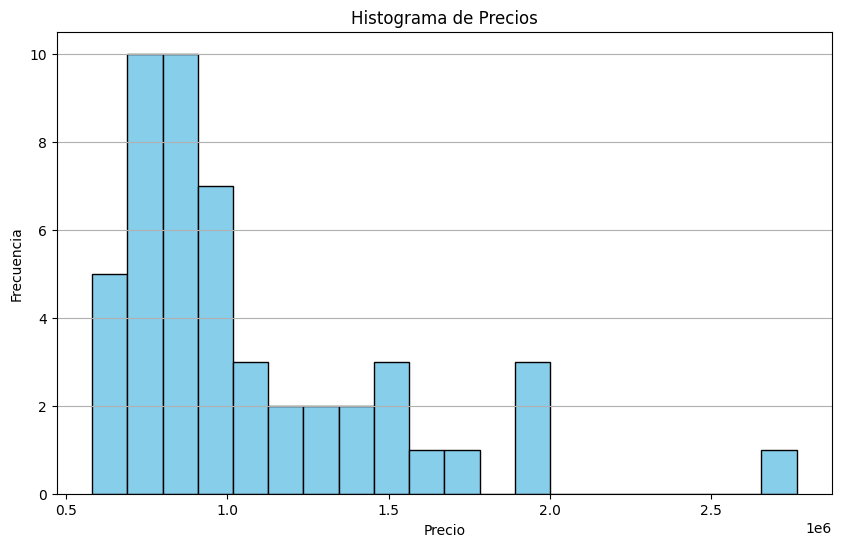


Outliers encontrados:
                                               Nombre     Precio
16  LG Artcool Inverter Thinq S4-w18klrpa Aire Aco...  1984499.0
44  Aire Acondicionado Inverter LG Dualcool Wifi F...  1988828.0
48  Aire Acondicionado Inverter LG S4-w24k2rpe Art...  2764428.0


In [ ]:
import matplotlib.pyplot as plt

# Histograma de precios
plt.figure(figsize=(10, 6))
plt.hist(Aires_df['Precio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
#plt.axvline(precio_promedio, color='red', linestyle='dashed', linewidth=1, label='Precio Promedio')
#plt.legend()
plt.show()

# Detección de outliers
Q1 = Aires_df['Precio'].quantile(0.25)
Q3 = Aires_df['Precio'].quantile(0.75)
IQR = Q3 - Q1
limites_superiores = Q3 + 1.5 * IQR
limites_inferiores = Q1 - 1.5 * IQR
# Una vez definido en rango intercuartílico, se determinan outliers aquellos valores por encima o por debajo de los límites
# superior e inferior, respectivamente.

outliers = Aires_df[(Aires_df['Precio'] < limites_inferiores) | (Aires_df['Precio'] > limites_superiores)]

if not outliers.empty:
  print("\nOutliers encontrados:")
  print(outliers)
else:
  print("\nNo se encontraron outliers.")


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.)

In [ ]:
# Resolver acá


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
pip install requests beautifulsoup4 pandas openpyxl

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from google.colab import files

# URL de la página principal de La Nación
url = "https://www.lanacion.com.ar/"

# Realizar la solicitud GET
response = requests.get(url)

# Comprobar que la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos los elementos 'a' que contengan los enlaces con 'nid'
    links = []
    categories = []
    current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    for link in soup.find_all('a', href=True):
        href = link['href']
        # Filtrar solo los enlaces que contienen 'nid'
        if 'nid' in href:
            if href.startswith('/'):
                full_link = f"https://www.lanacion.com.ar{href}"
            elif href.startswith("https://www.lanacion.com.ar"):
                full_link = href
            else:
                continue

            # Identificar la categoría a partir de la URL
            if '/politica' in href:
                category = 'Política'
            elif '/economia' in href:
                category = 'Economía'
            elif '/deportes' in href:
                category = 'Deportes'
            elif '/espectaculos' in href:
                category = 'Espectáculos'
            elif '/sociedad' in href:
                category = 'Sociedad'
            elif '/internacional' in href:
                category = 'Internacional'
            else:
                category = 'Otros'

            # Agregar los enlaces y categorías a las listas
            links.append((full_link, category, current_datetime))

    # Crear un DataFrame con los links y las categorías
    df = pd.DataFrame(links, columns=["Link", "Categoría", "Fecha y Hora de Obtención"])

    # Exportar a Excel
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    output_filename = f"lanacion_news_links_{timestamp}.xlsx"
    df.to_excel(output_filename, index=False)

    # Descargar el archivo en Colab
    files.download(output_filename)

    print(f"Links de noticias extraídos y guardados en {output_filename}")

else:
    print(f"Error al acceder a la página. Código de estado: {response.status_code}")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Links de noticias extraídos y guardados en lanacion_news_links_2024-10-24_00-58-27.xlsx
